In [2]:
# # Setting up google drive 
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# import sys
# sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

In [3]:
import my_utils as mu
import torch
from torch import nn

# The Task

* Our goal for this week is to write some code to create an MLP and then experiment with several training options and hyper-parameters.

* For this reason we will use again the same pipeline we used last week! 
    
* The Learning Outcome: Hands-on application of PyTorch's API for creating and training MLPs for classification.

In [4]:
# Read training and test data
batch_size = 256
train_iter, test_iter = mu.load_data_fashion_mnist(batch_size)

## Task 1


* The model below implements Softmax Regression. It has 1 Linear (or Fully-Connected Layer). Expand the `Net` class to have one more linear layer as follows: the 1st Linear layer will output `num_hidden` outputs. Set `num_hidden=10`.  Moreover, apply a `ReLU` activation function to the output of the 1st Linear layer. The second linear layer will have `num_hidden` inputs and 10 outputs (i.e. equal to the number of classes).



In [5]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.Linear1 = nn.Linear(num_inputs, num_hidden)
        self.ReLU = nn.ReLU()
        #self.ReLU = nn.Sigmoid()
        self.Linear2 = nn.Linear(num_hidden, num_outputs)
        
    def forward(self, x):
        x = x.view(-1, self.num_inputs)
        out = self.Linear1(x)
        out = self.ReLU(out)
        out = self.Linear2(out)
        return out

In [6]:
# Model instantiation and initialisation 
def init_weights(m):
    if type(m) == nn.Linear: # by checking type we can init different layers in different ways
        torch.nn.init.normal_(m.weight, std=0.01)
        torch.nn.init.zeros_(m.bias)

In [7]:
# Create and initialize your model here:
num_inputs, num_hidden, num_outputs = 784, 256, 10
net = Net(num_inputs, num_hidden, num_outputs)

# Initialise your model here using init_weights function. If not done, default initiliazation will be used.

# Loss and Optimization Algorithm
* As in Softmax Regression.

In [8]:
# Creare your loss here. Use Cross Entropy loss:
loss = nn.CrossEntropyLoss()
lr, wd = 0.001, 0
wd = 0.0005
# Creare your optimizer here. Use SGD with weight decay wd and learning rate lr.
#optimizer = torch.optim.SGD(net.parameters(), weight_decay=wd, lr=lr)
optimizer = torch.optim.Adam(net.parameters(), weight_decay=wd, lr=lr)

# Training

* Use `my_utils.train_ch3` as in Softmax Regression

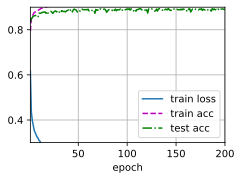

In [9]:
num_epochs = 200
mu.train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)

## Further Tasks

* Explore the following training options and observe their impact on the evolution of the **training loss**, the **training accuracy** and the **validation accuracy**. Different choices might have different impact on both accuracy and convergence:
    1. Change the number of hidden layers to 256
    1. Investigate different learning rates. Use 0.5, 0.9 and 0.01.
    1. Investigate adding weight decay wd=0.0005
    1. Investigate `Sigmoid` activation function. 
    1. Try different schemes for initializing the weights. 